### Get User Interaction Counts

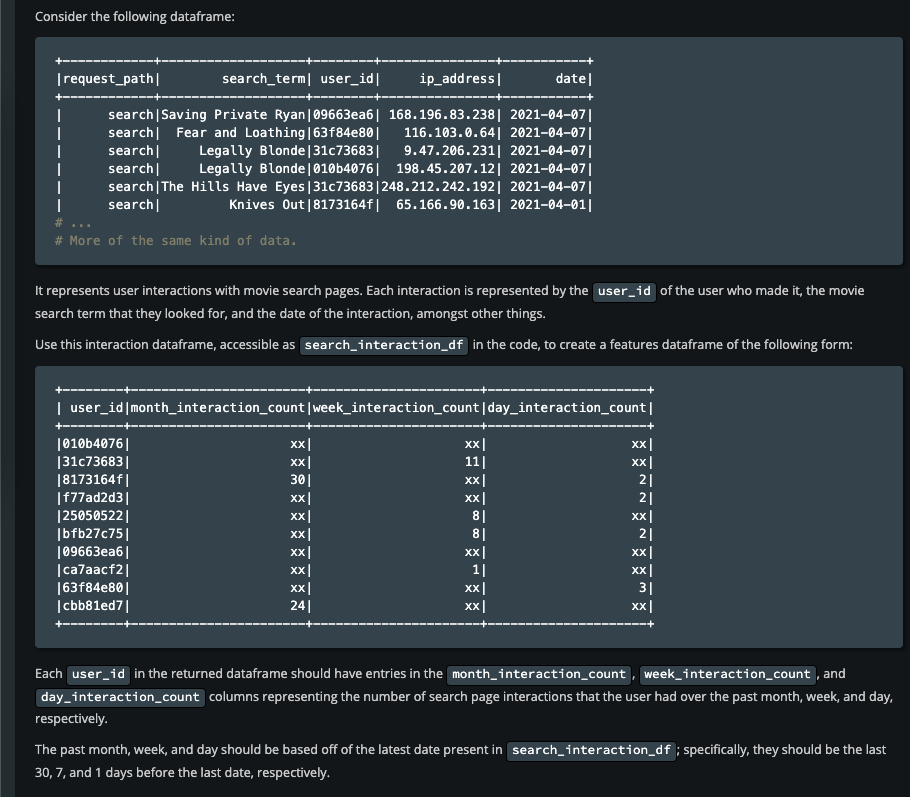

In [ ]:
"""
Pseudo Code and Comments 
1. From the latest date find in the dataframe
    a. Agg to find max of a column
    b. Extract the value from dataframe with collect()
2. Select rows only in last month and group rows by userID to get month counts
    a. where() to filter dates
    b. groupBy() to group the userIDs
    c. count() to get counts()
3. Repeat for week and day counts
4. Join the month, week, day counts into a single data frame 
"""
from datetime import datetime, timedelta

def get_user_interaction_counts(search_interaction_df):
    # Write your code here.
    latest_date_string = search_interaction_df.agg({"date": "max"}).collect()[0][0]
    latest_date = datetime.strptime(latest_date_string, '%Y-%m-%d')

    user_month_counts = get_df_counts_from_date_by_user_id(search_interaction_df, latest_date, 30)
    user_week_counts = get_df_counts_from_date_by_user_id(search_interaction_df, latest_date, 7)
    user_day_counts = get_df_counts_from_date_by_user_id(search_interaction_df, latest_date, 1)

    user_month_counts = user_month_counts.withColumnRenamed("count", "month_interaction_count")
    user_week_counts = user_week_counts.withColumnRenamed("count", "week_interaction_count")
    user_day_counts = user_day_counts.withColumnRenamed("count", "day_interaction_count")

    user_interaction_counts = user_month_counts.join(user_week_counts, ['user_id'], "left")
    user_interaction_counts = user_interaction_counts.join(user_day_counts, ['user_id'], "left")
    user_interaction_counts = user_interaction_counts.na.fill(0)

    return user_interaction_counts

def get_df_counts_from_date_by_user_id(df, end_date, days_delta):
    start_date = end_date - timedelta(days=days_delta)

    return df.where(df['date'].between(start_date, end_date)).groupBy("user_id").count()
